In [1]:
import pandas as pd

df = pd.read_csv('nga_mh.csv')
df.head(10)

,uid,user_level,user_prestige,user_famous,register_date,publish_date,publish_source,content
0,9249955,Warden,(lv0),920.0,10-12-01,2018-04-25 17:01,nga,NaN
1,39127007,学徒,1,NaN,16-09-29,2018-04-26 14:15,nga,已加
2,38419995,学徒,1,NaN,16-05-29,2018-04-26 14:38,android,头一次离红字这么近，已加，给各位大佬递茶。
3,42628349,学徒,1,NaN,18-02-07,2018-04-26 14:38,ios,前排zsbd
4,42706331,学徒,1,NaN,18-03-04,2018-04-26 15:30,ios,已?，
5,131255,Old God,31,NaN,05-06-24,2018-04-26 15:33,nga,已申请加入
6,2313325,学徒,1,NaN,09-07-06,2018-04-26 15:37,android,前排 已申请
7,493758,学徒,1,NaN,06-10-31,2018-04-26 17:15,android,已申请加入
8,4515344,学徒,1,NaN,09-11-19,2018-04-26 17:20,nga,前排啊，第一次前排啊已申请啊
9,17785779,学徒,1,NaN,12-06-23,2018-04-26 17:21,ios,前排，终于找到组织了


In [2]:
print("There are " + str(len(df)) + " posts")

There are 1589 posts


In [3]:
post_time = df.publish_date 

In [4]:
from datetime import datetime, timedelta
import matplotlib
test = post_time[0]



date = datetime.strptime(test,'%Y-%m-%d %H:%M')
weekno = date.weekday()
if weekno < 5:
    print('weekday')
else:
    print('weekend')
print("%s:%s" % (date.hour, date.minute))
dates = matplotlib.dates.date2num([date])

# dates

weekday
17:1


AttributeError: module 'matplotlib' has no attribute 'dates'

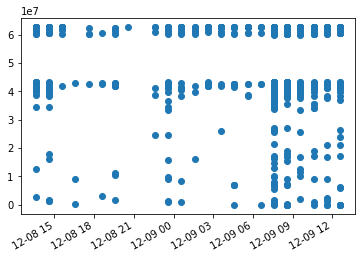

In [7]:
import matplotlib.pyplot as plt


post_time = []
replies = []

for index, row in df.iterrows():
    date = datetime.strptime(row['publish_date'],"%Y-%m-%d %H:%M")
    if date.weekday() > 4:
        post_time.append(datetime.now()+timedelta(hours = date.hour))
        replies.append(row['uid'])
    
time = matplotlib.dates.date2num(post_time)

plt.plot_date(time, replies)
plt.gcf().autofmt_xdate()
plt.show()


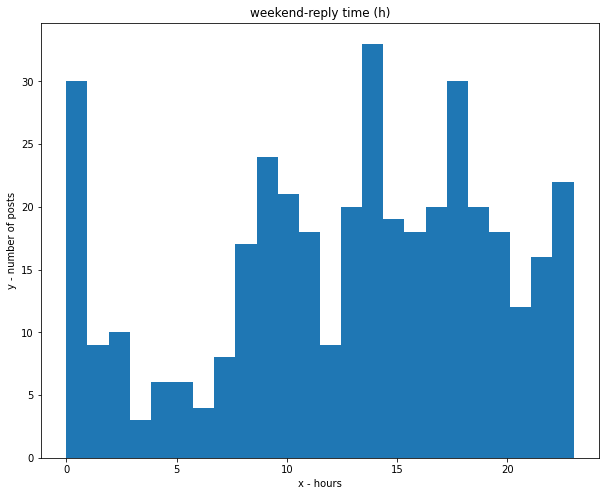

In [10]:
# weekends
import matplotlib.pyplot as plt
hours = []
for index, row in df.iterrows():
    date = datetime.strptime(row['publish_date'],"%Y-%m-%d %H:%M")
    if date.weekday() > 4:
        hours.append( date.hour)



plt.rcParams["figure.figsize"]= (10,8)
plt.hist(hours,bins=24)
plt.title('weekend-reply time (h)')
plt.xlabel('x - hours')
plt.ylabel('y - number of posts')

plt.show()

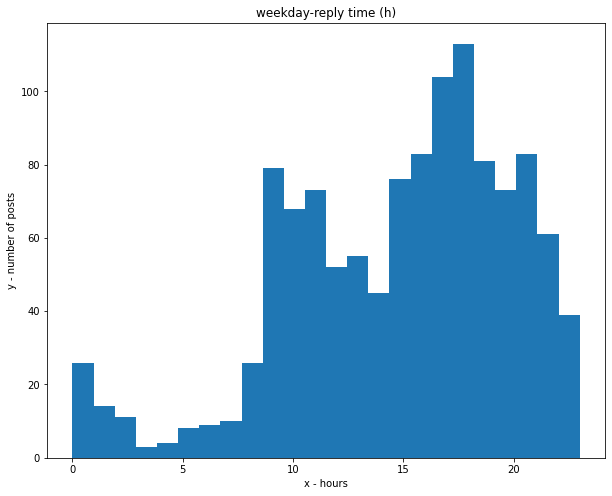

In [9]:
# weekdays
import matplotlib.pyplot as plt
hours = []
for index, row in df.iterrows():
    date = datetime.strptime(row['publish_date'],"%Y-%m-%d %H:%M")
    if date.weekday() <= 4:
        hours.append( date.hour)

plt.rcParams["figure.figsize"]= (10,8)
plt.hist(hours,bins=24)
plt.title('weekday-reply time (h)')
plt.xlabel('x - hours')
plt.ylabel('y - number of posts')

plt.show()

In [ ]:
import sys
!{sys.executable} -m pip install jieba

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/dc/r642wkmn5vl1hk633qxzt7g00000gn/T/jieba.cache
Loading model cost 0.788 seconds.
Prefix dict has been built successfully.


(-0.5, 399.5, 199.5, -0.5)

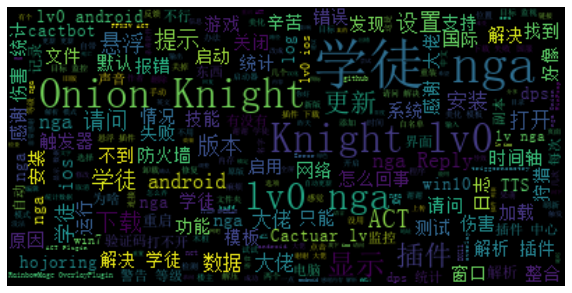

In [23]:
import jieba
jieba.enable_parallel(4)
import os
from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
stopwords_path = './stopwords_cn_en.txt'
font_path = './font/simsun.ttc'
userdict_list = ['招募', '美区', '时间', '收留','近战','找到','陪练','接收']


# The function for processing text with Jieba
def jieba_processing_txt(text):
    for word in userdict_list:
        jieba.add_word(word)

    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/ ".join(seg_list)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ' '.join(mywordlist)


# Read the whole text.
text = open('nga_fflogs.csv').read()

wc = WordCloud(font_path=font_path, max_words=2000, max_font_size=40)

# Generate a word cloud image
wordcloud = wc.generate(jieba_processing_txt(text))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

In [14]:
!pip install nltk

You should consider upgrading via the '/Users/xiao2/opt/anaconda3/envs/tf/bin/python -m pip install --upgrade pip' command.


In [18]:
conda install pandas textblob nltk wordcloud seaborn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - textblob
  - wordcloud

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [19]:
!pip install wordcloud

You should consider upgrading via the '/Users/xiao2/opt/anaconda3/envs/tf/bin/python -m pip install --upgrade pip' command.


In [26]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import seaborn as sns
import re, string
import sys
import time
import matplotlib.pyplot as plt

In [24]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/xiao2/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
import collections
import re
def tokenize(s):
    """Convert string to lowercase and split into words (ignoring
    punctuation), returning list of words.
    """
    word_list = re.findall(r'\w+', s.lower())
    filtered_words = [word for word in word_list if word not in stopwords.words('english')]
    return filtered_words
def count_ngrams(lines, min_length=2, max_length=4):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)
# Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1
# Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()
# Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()
    return ngrams
def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-word phrase -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')
def print_word_cloud(ngrams, num=5):
    """Print word cloud image plot """
    words = []
    for n in sorted(ngrams):
        for gram, count in ngrams[n].most_common(num):
            s = ' '.join(gram)
            words.append(s)
            
    cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(words))
    plt.figure(figsize=(20, 15))
    plt.imshow(cloud)
    plt.axis('off');
    plt.show()
    print('')

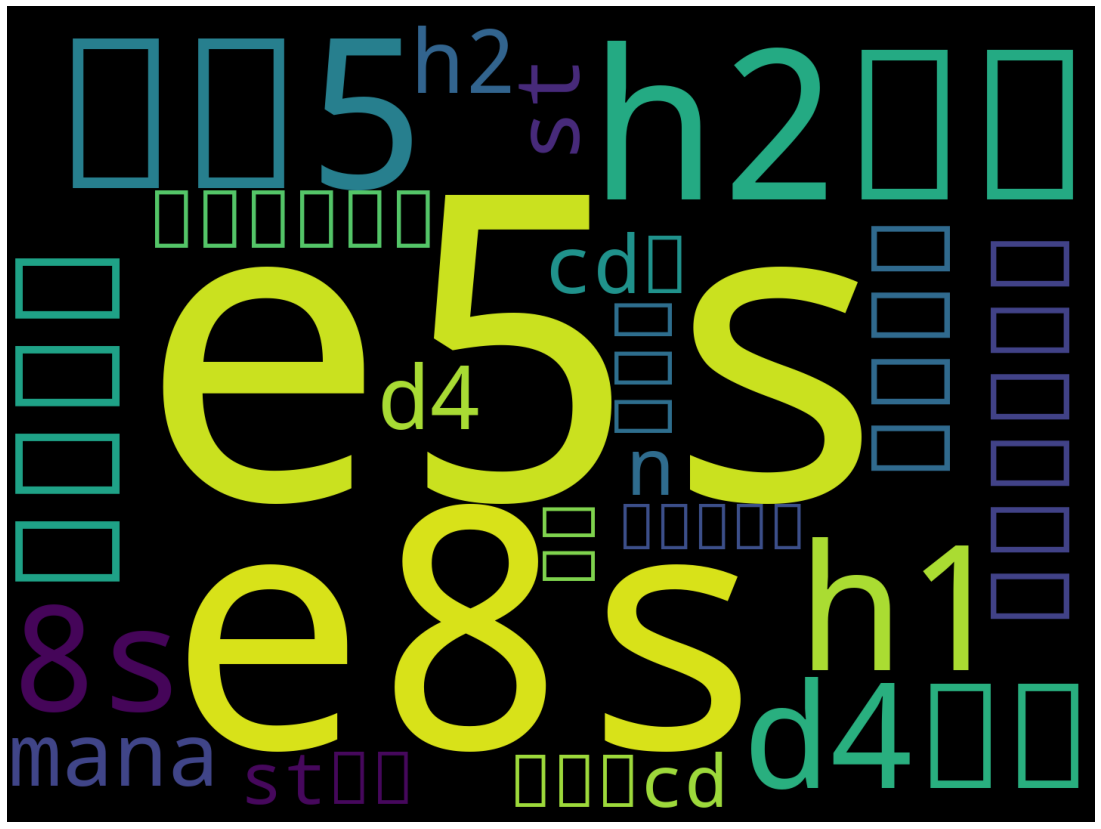

In [27]:
most_frequent_topic = count_ngrams(topic,max_length=3)
print_word_cloud(most_frequent_topic, 10)

In [ ]:
desc = []
for row in df.rows:
    desc.append(row['topic_description'].replace(',',''))